# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [13]:
duplicate_ids

array(['g989'], dtype=object)

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_ids)]
# Print the clean DataFrame
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

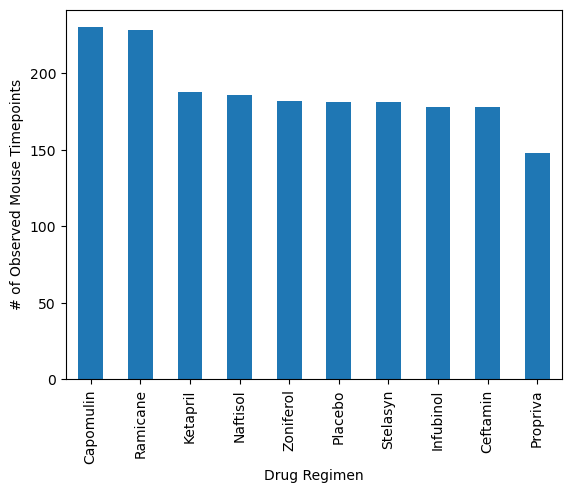

In [10]:
# Count the number of rows for each drug regimen          Using Pandas
counts = clean_df['Drug Regimen'].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind='bar')

# Set the X and Y axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

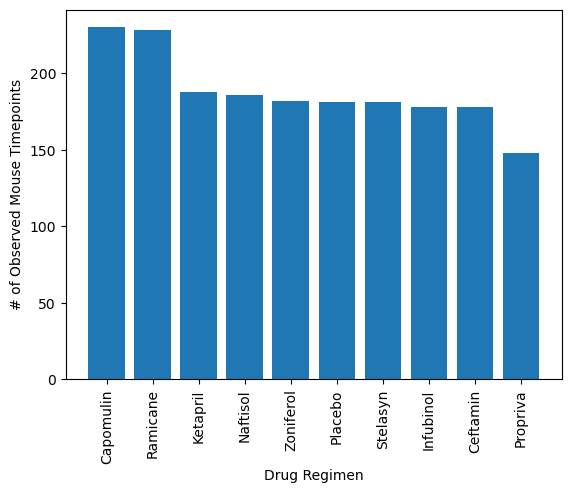

In [11]:
# Count the number of rows for each drug regimen            Using pyplot
counts = clean_df['Drug Regimen'].value_counts()

# Drug regimens and their corresponding counts
drug_regimens = counts.index
count_values = counts.values

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimens, count_values)

# Set the X and Y axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
# Show the Plot
plt.show()

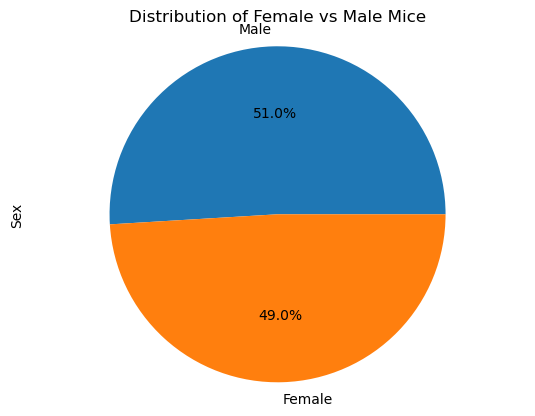

In [12]:
# Count the number of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the plot title
plt.title('Distribution of Female vs Male Mice')

# Set the aspect ratio to 'equal' for a circular pie
plt.axis('equal')

# Show the plot
plt.show()


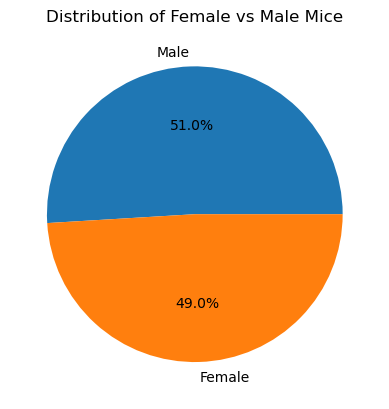

In [13]:
# Count the number of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# Get the labels and sizes for the pie plot
labels = gender_counts.index
sizes = gender_counts.values

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set the plot title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

In [25]:
# Filter the DataFrame based on the treatment groups
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_groups)]

# Print the filtered DataFrame for only 4 Treatment Regimen
filtered_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter the data for the four treatment regimens
treatment_groups = ['Capomulin', 'Infubinol', 'Ceftamin', 'Ramicane']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = filtered_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

# Print the final tumor volume of each mouse
final_tumor_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [17]:
# A DatFrame that has the last timepoint for each mouse ID is created using groupby.
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Print the DF with the last timepoint for each mouse ID
last_timepoint_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Loop through each treatment group
for group in treatment_groups:
    # Select the tumor volume data for the current treatment group
    group_data = clean_df.loc[clean_df['Drug Regimen'] == group, 'Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Find the outliers in the group data
    outliers = group_data.loc[(group_data < lower_bound) | (group_data > upper_bound)]
    
    # Print the IQR and outliers for the current treatment group
    print(f"Treatment Group: {group}")
    print(f"IQR: {iqr}")
    print(f"Outliers: {outliers}\n")


Treatment Group: Capomulin
IQR: 7.314067135000002
Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Treatment Group: Infubinol
IQR: 10.002090667500006
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Group: Ceftamin
IQR: 9.593010457500007
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Group: Ramicane
IQR: 8.325365415
Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64



In [20]:
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Append tumor volume data to the list

for index, row in filtered_df.iterrows():
    tumor_volume = row['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)

# Print the tumor volume data list
tumor_volume_data


[45.0,
 38.82589807,
 35.01427146,
 34.22399174,
 32.99772858,
 33.46457735,
 31.09949753,
 26.54699343,
 24.36550471,
 22.05012627,
 45.0,
 43.87849569,
 37.61494768,
 38.17723195,
 36.86687576,
 33.94994037,
 32.95967078,
 28.32853059,
 25.47214326,
 23.34359787,
 45.0,
 45.47375302,
 39.11389068,
 39.77625003,
 36.06583471,
 36.61712031,
 32.91529186,
 30.20682488,
 28.16739732,
 28.48403281,
 45.0,
 41.40859145,
 36.82536664,
 35.46461175,
 34.2557317,
 33.11875607,
 31.75827491,
 30.83435704,
 31.3780453,
 28.43096411,
 45.0,
 45.85153062,
 40.17055848,
 40.67812852,
 41.211897,
 35.56939935,
 34.95258284,
 30.96039194,
 31.36940573,
 29.12847181,
 45.0,
 38.71187185,
 34.8509979,
 35.27690634,
 35.92865083,
 36.33856894,
 35.47402235,
 35.8461407,
 32.79817119,
 30.27623175,
 45.0,
 38.79647373,
 35.6244027,
 32.62300253,
 30.48598484,
 45.0,
 42.99887638,
 43.74822357,
 39.89743533,
 36.71229535,
 37.44444543,
 37.96993365,
 38.62753581,
 35.1145752,
 30.56462509,
 45.0,
 42.188

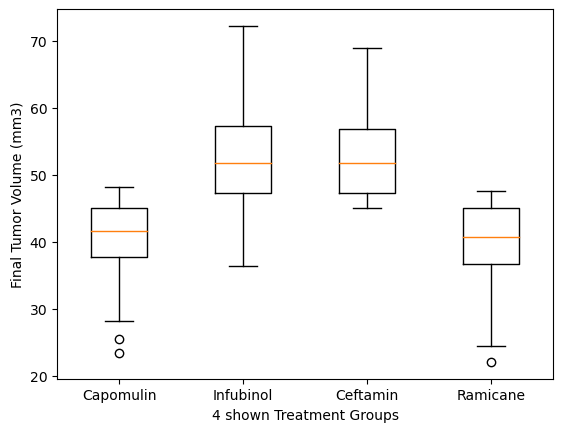

In [21]:
# Create a list to store the tumor volume data for each treatment group
tumor_volume_data = []

# Extract the tumor volume data for each treatment group
for group in treatment_groups:
    group_data = clean_df.loc[clean_df['Drug Regimen'] == group, 'Tumor Volume (mm3)']
    tumor_volume_data.append(group_data)

# Create the box plot, shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatment_groups)

# Label the X and Y axis 
plt.xlabel('4 shown Treatment Groups')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

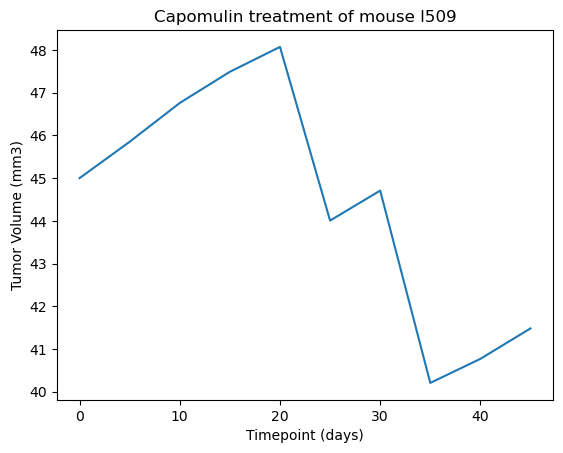

In [23]:
mouse_id = 'l509'
treatment_group = 'Capomulin'

# Filter the data for the specific mouse and treatment group
mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == treatment_group)]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the plot title and axis labels
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

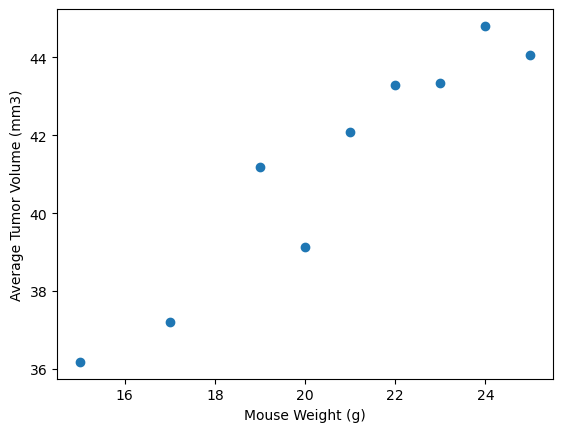

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group the data by mouse weight and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Set the plot X and Y axis labels

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.9505243961855268


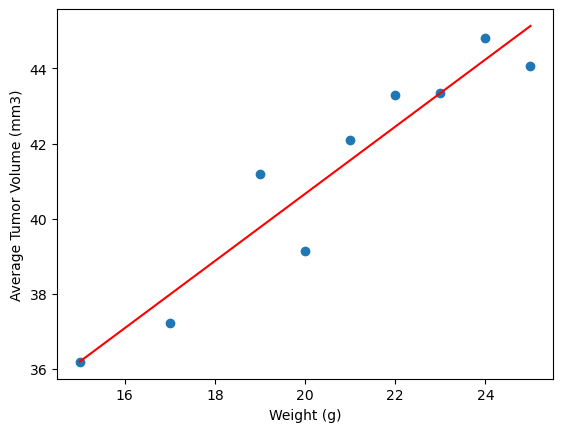

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress

# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group the data by mouse weight and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Extract the mouse weights and average tumor volumes
weights = average_tumor_volume['Weight (g)']
tumor_volumes = average_tumor_volume['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(weights, tumor_volumes)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Create the scatter plot
plt.scatter(weights, tumor_volumes)

# Perform linear regression
regression = linregress(weights, tumor_volumes)
slope = regression.slope
intercept = regression.intercept
fit_line = slope * weights + intercept

# Add the linear regression line to the plot
plt.plot(weights, fit_line, color='red')

# Set the plot title and axis labels
# plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


In [6]:
combined_df.to_excel("data/combined_df.xlsx")

In [16]:
clean_df.to_excel("data/clean_df.xlsx")